# Assignment 1

__*m12001643 Ilyes Justin <br>
m11804717 Seidl Stefan <br>
m01605389 Wagemaier Daniel*__ <br>

## 1) Import Librarys

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
import sklearn.model_selection as skms
from sklearn import tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

## 2) Import data and create test, training and validation set

In [13]:
file_name = 'alldigits.csv'
df = pd.read_csv(file_name)
data = df.to_numpy()

X = data[:, :-1]
y = data[:, -1]

test_size = 0.1
validation_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_size/(1-test_size), random_state=0)

total_points_testSet = len(y_test)
total_points_valSet = len(y_val)

## 3) Plotting the Images

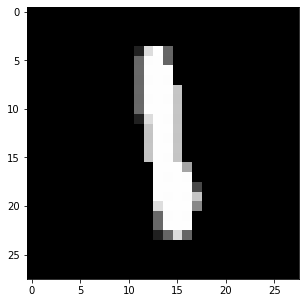

In [3]:
pictures = []
picture_size = 28
for row in data:
    single_picture_matrix = []
    for i in range(picture_size):
        inner_list = []
        for j in range(picture_size):
            inner_list.append(int(row[j * picture_size + i]))
        single_picture_matrix.append(inner_list)
    pictures.append(single_picture_matrix)

plt.rcParams['figure.figsize'] = [10, 5] #change inline figure size [width, higth]
n = 200    
plt.imshow(pictures[n], cmap='Greys_r', vmin=0, vmax=255)
plt.show() 

# 4) Analyse the Data

Points in Trainset: 4200
Points in Testset: 600
Points in Validationset: 1200
Test/Train Ratio: 0.14285714285714285
Validation/Train Ratio: 0.2857142857142857


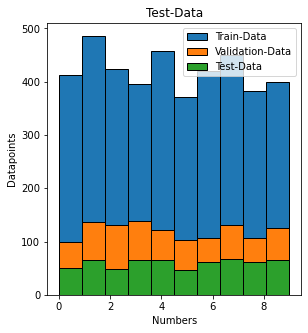

In [9]:
print("Points in Trainset: " + str(len(y_train)))
print("Points in Testset: " + str(len(y_test)))
print("Points in Validationset: " + str(len(y_val)))
print("Test/Train Ratio: " + str(len(y_test)/len(y_train)))
print("Validation/Train Ratio: " + str(len(y_val)/len(y_train)))

plt.figure(1)
plt.align = "mid"

plt.subplot(1, 2, 1)
plt.hist(y_train,10,edgecolor="black")
plt.title("Train-Data")
plt.xlabel("Numbers")
plt.ylabel("Datapoints")

#plt.subplot(1, 2, 2)
plt.hist(y_val,10,edgecolor="black")
plt.title("Validation-Data & Test-Data")
plt.xlabel("Numbers")
plt.ylabel("Datapoints")

plt.hist(y_test,10,edgecolor="black")
plt.title("Test-Data")
plt.ylabel("Datapoints")
plt.xlabel("Numbers")

plt.legend(["Train-Data", "Validation-Data", "Test-Data"])

# 5) Decision Tree

In [14]:
dtc = tree.DecisionTreeClassifier() # creates the decision tree classifier (default = "gini")
dtc.fit(X_train, y_train) # trains the model
predicted = dtc.predict(X_val) # classifies/predicts incoming test data

dtc_correct_labeled = (y_val == predicted).sum()
print("Correct labeled(Decision Tree): " + str(dtc_correct_labeled) + " from " + \
      str(total_points_testSet) + " (" + str((dtc_correct_labeled/total_points_valSet)*100) +"%)")

Correct labeled(Decision Tree): 876 from 600 (73.0%)


In [15]:
print(
    f"Classification report of DecisionTreeClassifier():\n"
    f"{classification_report(y_val, predicted, digits=3)}\n"
)

Classification report of DecisionTreeClassifier():
              precision    recall  f1-score   support

           0      0.837     0.870     0.853       100
           1      0.890     0.942     0.915       137
           2      0.734     0.695     0.714       131
           3      0.674     0.655     0.664       139
           4      0.715     0.727     0.721       121
           5      0.619     0.631     0.625       103
           6      0.777     0.755     0.766       106
           7      0.733     0.756     0.744       131
           8      0.615     0.551     0.581       107
           9      0.669     0.696     0.682       125

    accuracy                          0.730      1200
   macro avg      0.726     0.728     0.727      1200
weighted avg      0.728     0.730     0.729      1200




<span style="font-size:15px;"> **Precision**: <span style="font-size:13px;"> percentage of correct predictions <br />
<span style="font-size:15px;"> **Recall**: <span style="font-size:13px;"> percentage of positive cases found <br />
<span style="font-size:15px;"> **F1 score**: <span style="font-size:13px;"> measure of a test's accuracy (relies solely on precision and recall) <br />
<span style="font-size:15px;"> **Accuracy**: <span style="font-size:13px;"> mean of F1 Score <br />
<span style="font-size:15px;"> **Macro Average**: <span style="font-size:13px;"> unweighted mean for all labels <br />
<span style="font-size:15px;"> **Weighted Average**: <span style="font-size:13px;"> weighted mean based off of support from each label <br />
<br />
<span style="font-size:15px;"> $$ Precision = {True Positive \over (True Positive + False Positive)} $$  <br />
<span style="font-size:15px;"> $$ Recall = {True Positive \over (True Positive + False Negative)} $$  <br />
<span style="font-size:15px;"> $$ F1 score = {2*(Precision*Recall) \over (Precision+Recall)} $$

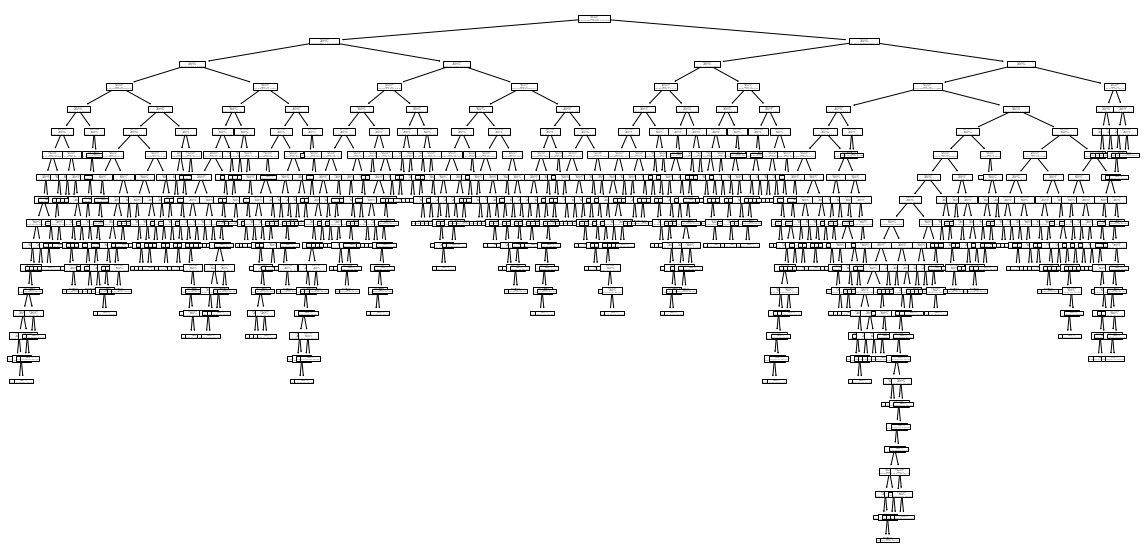

In [16]:
plt.rcParams['figure.figsize'] = [20, 10] #change inline figure size [width, higth]
tree.plot_tree(DTC)
plt.show() # visualizes the decision tree

# 6) Naive Bayes

## 6.1) Gaussian 


In [ ]:
gnb = GaussianNB()
y_pred_gauss = gnb.fit(X_train, y_train).predict(X_test)
gauss_correct_labeled = (y_val == y_pred_gauss).sum()
print("Correct labeled(Gauss): " + str(gauss_correct_labeled) + " from " + \
      str(total_points_testSet) + " (" + str((gauss_correct_labeled/total_points_testSet)*100) +"%)")

## 6.2) Multinominal

In [ ]:
mNB = MultinomialNB()
y_pred_multi = mNB.fit(X_train, y_train).predict(X_test)
multi_correct_labeled = (y_val == y_pred_multi).sum()
print("Correct labeled(Multinominal): " + str(multi_correct_labeled) + " from " + \
      str(total_points_testSet) + " (" + str((multi_correct_labeled/total_points_testSet)*100) +"%)")

## 6.3) Complement

In [ ]:
cNB = ComplementNB()
y_pred_comp = cNB.fit(X_train, y_train).predict(X_test)
comp_correct_labeled = (y_val == y_pred_comp).sum()
print("Correct labeled(Complement): " + str(comp_correct_labeled) + " from " + \
      str(total_points_testSet) + " (" + str((comp_correct_labeled/total_points_testSet)*100) +"%)")

## 6.4) Bernoulli

In [ ]:
bNB = BernoulliNB()
y_pred_ber = bNB.fit(X_train, y_train).predict(X_test)
ber_correct_labeled = (y_val == y_pred_ber).sum()
print("Correct labeled(Bernoulli): " + str(ber_correct_labeled) + " from " + \
      str(total_points_testSet) + " (" + str((ber_correct_labeled/total_points_testSet)*100) +"%)")

## 6.5) Categorical

In [ ]:
catNB = CategoricalNB(min_categories=256)
y_pred_cat = catNB.fit(X_train, y_train).predict(X_test)
cat_correct_labeled = (y_val == y_pred_cat).sum()
print("Correct labeled(Categorical): " + str(cat_correct_labeled) + " from " + \
      str(total_points_testSet) + " (" + str((cat_correct_labeled/total_points_testSet)*100) +"%)")

## 6.6) Summary

*RNG_Seed = 0*

|test_size|Gaussian|Multinominal|Complement|Bernoulli|Categorical|Decision Tree|
|---|---|---|---|---|---|---|
|0.1|57.33|82.83|70.17|84.17|67.17|81.33|
|0.3|56.28|82.67|70.22|83.83|62.56|76.17|
|0.5|55.7|82.17|70.63|82.63|57.3|73.07|
|0.7|56.12|82.26|70.95|81.95|48.74|71.29|
|0.9|58.94|81.7|70.48|81.0|30.48|62.78|

## 7) Error estimation and comparison

To calculate the upper error boundary a confidence of 95% percent was chosen.